In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import filament_functions as fils 
import read_fils as rf

In [4]:
nsig=10
name='cosmoDC2_v1.1.4_small_with_photozs_v1.stamp.67.25.67.75.-37.5.-37.zslice.photo.0.6.0.8-curved-mse-disperse'
#name='cosmoDC2_v1.1.4_small_with_photozs_v1.healpix_pixel9816.stamp.67.25.67.75.-37.5.-37.zslice.photo.0.6.0.8-curved-disperse'

In [5]:
path_to_skel = f'../Catalogs/{name}_nsig{nsig}_final.S002.BRK.a.NDskl'
#path_to_skel = f'../Catalogs/{name}_final.S002.BRK.a.NDskl'

In [6]:
filaments=rf.ReadFilament2D(path_to_skel)
#115 filaments in pre mse version
#224 filaments in sigma 7 for mse version
#200 for 8
#176 for 9
#170 for 10

header1, ANDSKEL

ndims, 2

Comments, #No comments (RB)

Bounding box, BBOX [-15.2476,-15.292] [30.4655,30.5342]

ncrit, 259
nfils, 170
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.01 secs.


In [7]:
fildict = filaments.filament_dict['filaments']

In [8]:
filnum=len(fildict)

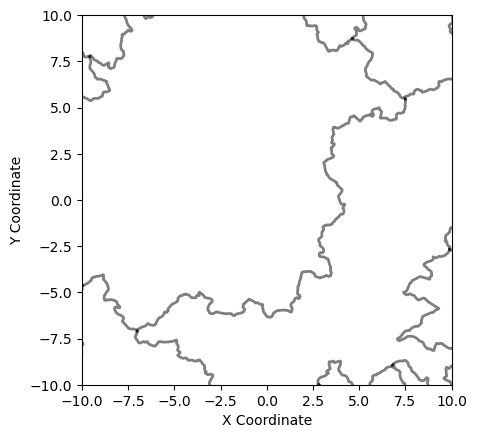

In [9]:
ax = plt.gca()
for i in range(filnum):
    fils.plot_2D(i,fildict)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
ax.set_aspect('equal', adjustable='box')
tick_values = np.linspace(-10,10,9)
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.draw()
plt.savefig(f'./FilPics/{name}_nsig{nsig}.png')

In [10]:
galaxies=pd.read_csv(f'../Catalogs/{name}.txt', sep='\t') 

In [11]:
galaxies

,id,px,py,stellar_mass
0,8062500279,-8.589391,8.652230,1.043287e+06
1,8062500512,-5.641441,13.375850,8.594449e+05
2,8062500515,7.264992,10.826290,9.058346e+05
3,8062501167,0.519433,-3.660882,4.297643e+05
4,8062501223,0.496191,-10.924140,2.783277e+06
...,...,...,...,...
110487,8082698585,9.365140,-3.335890,6.491833e+09
110488,8082699023,-10.368790,0.686770,1.201093e+10
110489,8082706538,8.083137,3.733609,1.132923e+10
110490,8082708708,2.587193,-11.517460,1.263435e+09


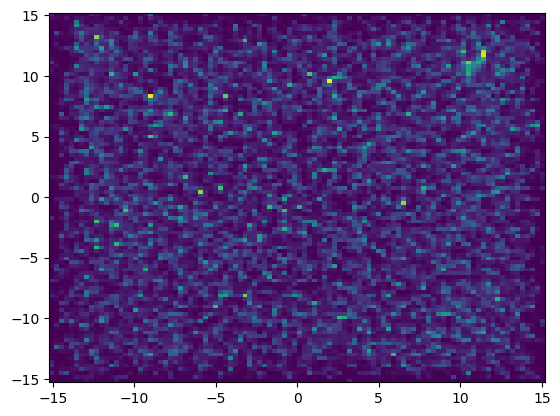

In [12]:
h=plt.hist2d(galaxies.px,galaxies.py,bins=(100,100));

In [13]:
import matplotlib.colors as colors

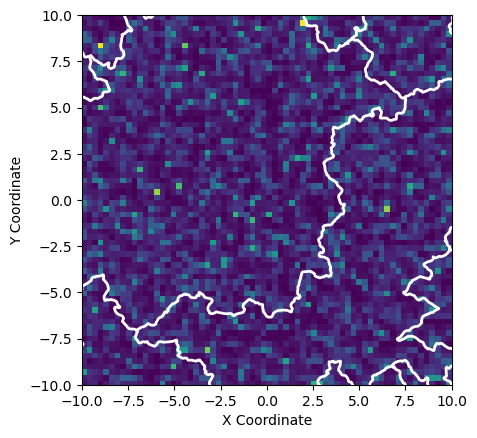

In [14]:
ax = plt.gca()
for i in range(filnum):
    fils.plot_2D(i,fildict,colorfil='white',a=1)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
ax.set_aspect('equal', adjustable='box')
tick_values = np.linspace(-10,10,9)
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.hist2d(galaxies.px,galaxies.py,bins=(100,100))
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.draw()
plt.savefig(f'./FilPics/{name}_nsig{nsig}_density.png')

In [15]:
import scipy

In [16]:
statistic, x_edges, y_edges, _=scipy.stats.binned_statistic_2d(x=galaxies.px,y=galaxies.py,values=None,statistic='count',bins=(100,100))

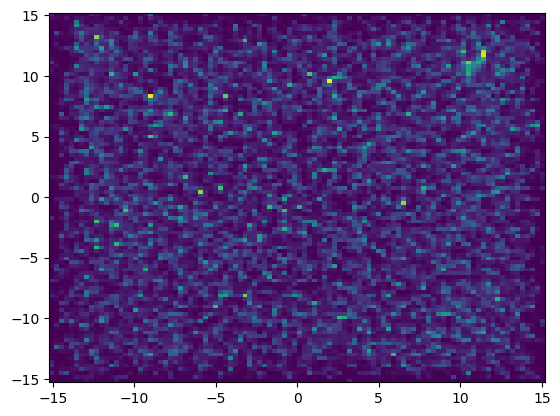

In [17]:
plt.pcolormesh(x_edges, y_edges, statistic.T)

In [18]:
stat2=scipy.ndimage.gaussian_filter(statistic, sigma=2)

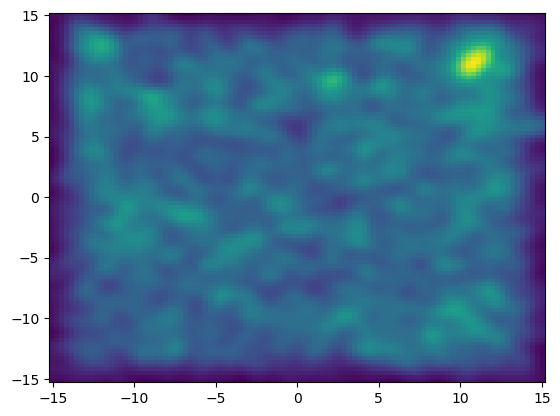

In [19]:
plt.pcolormesh(x_edges, y_edges, stat2.T)

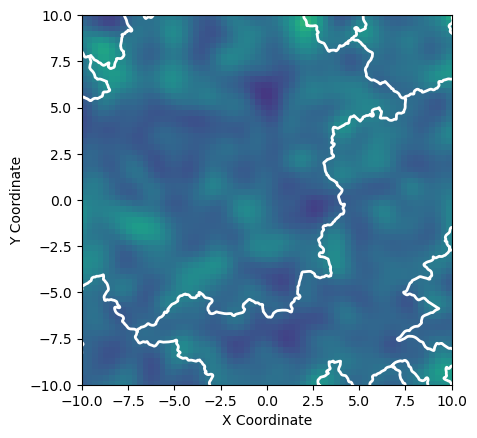

In [20]:
ax = plt.gca()
for i in range(filnum):
    fils.plot_2D(i,fildict,colorfil='white',a=1)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
ax.set_aspect('equal', adjustable='box')
tick_values = np.linspace(-10,10,9)
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.pcolormesh(x_edges, y_edges, stat2.T)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.draw()
plt.savefig(f'./FilPics/{name}_nsig{nsig}_densitysmooth.png')